# Explore here

In [1]:
# Your code here

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [2]:
#nuestro shape arroja que hay 16 columnas y 48895 filas 
#por lo que podemos notar que tenemos 4 columas con valores nulos siendo las mas destacables last_review y reviews_per_month
df.shape

(48895, 16)

In [3]:
#Tenemos 10 variables numericas y 6 categoricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.isnull().sum().sort_values(ascending = False)


last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
neighbourhood_group                   0
neighbourhood                         0
id                                    0
host_id                               0
longitude                             0
latitude                              0
room_type                             0
price                                 0
number_of_reviews                     0
minimum_nights                        0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
print(f'datos duplicados en id {df["id"].duplicated().sum()}')
print(f'datos duplicados en name {df["name"].duplicated().sum()}')
print(f'datos duplicados en host_id {df["host_id"].duplicated().sum()}')

datos duplicados en id 0
datos duplicados en name 989
datos duplicados en host_id 11438


In [6]:
#de host_id es creible y entendible que haya valores repetidos ya que puede haber un solo propietario con varias propiedades listadas
#el nombre aunque poco probable es posible que existan valores repetidos ya que muchos usan nombres como apartment in <zona> o house in <zona>
#por lo anterior considero que no es necesario eliminar los duplicados ya que podemos perder información

In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Decidimos eliminar last_review, reviews_per_month,name,id, host_name ya que consideramos que no hay valor significativo para este estudio. Tambien entendemos que 'latitude', 'longitude' va dado por la ubicación en su Distrito y Barrio correspondiente

In [8]:
df.drop(["last_review","reviews_per_month","name","id","host_name",'latitude', 'longitude'],axis=1,inplace=True)
df.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


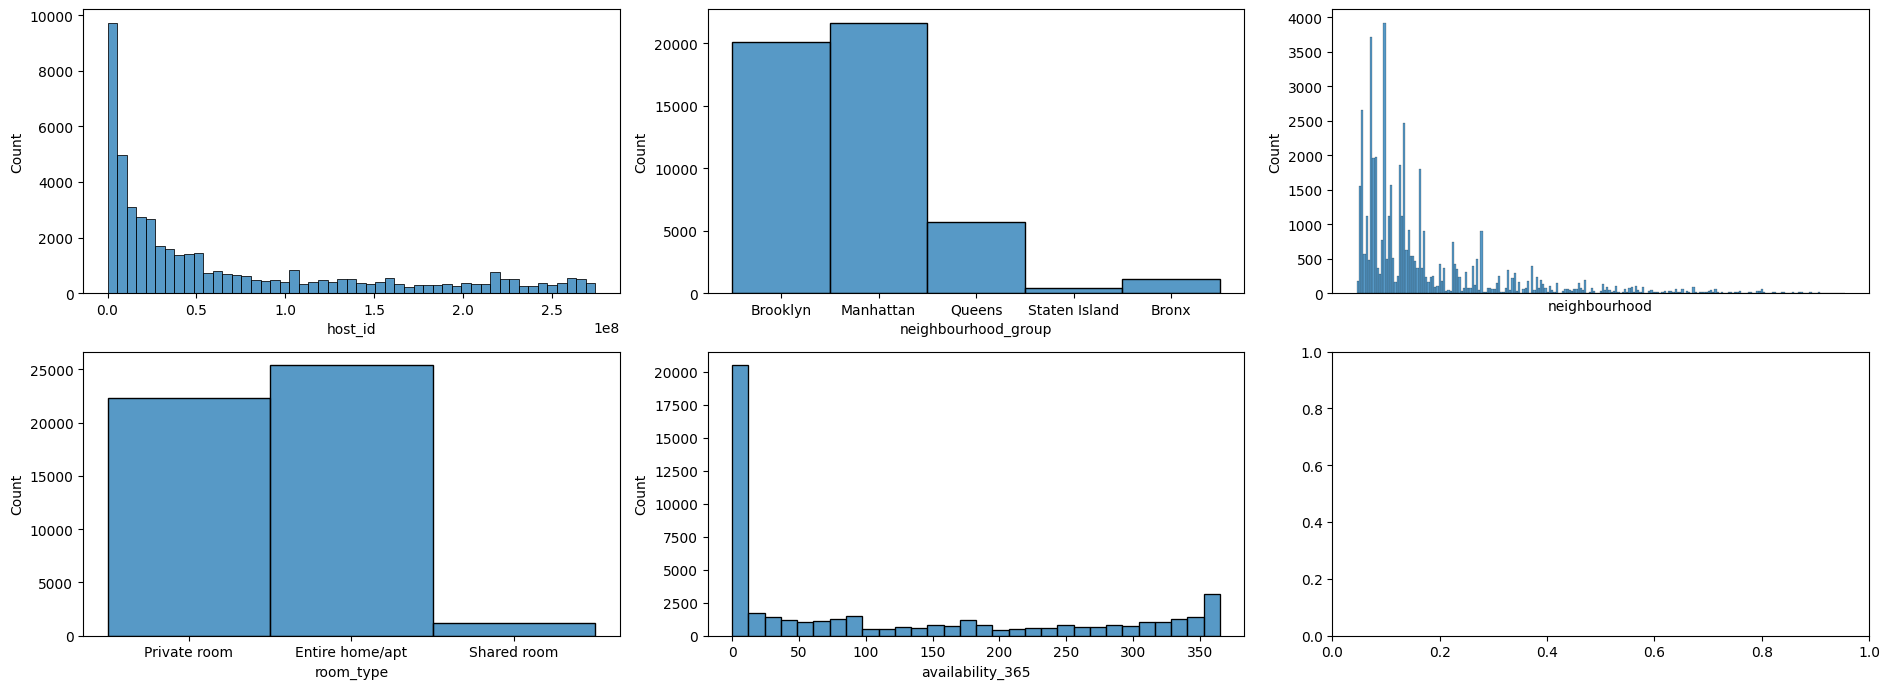

In [9]:
#Analisis de variables categoricas

import matplotlib.pyplot as plt
import seaborn as sns

fig,axis=plt.subplots (2,3, figsize=(19,7))

sns.histplot(ax=axis[0,0],data=df, x= "host_id")
sns.histplot(ax=axis[0,1],data=df, x= "neighbourhood_group")
sns.histplot(ax=axis[0,2],data=df, x= "neighbourhood").set_xticks([]) #para eliminar los valores del eje x son muchos
sns.histplot(ax=axis[1,0],data=df, x= "room_type")
sns.histplot(ax=axis[1,1],data=df, x= "availability_365")


plt.tight_layout()
plt.show()

En el primer histograma podemos observar que hay host que tienen muchas propiedades para alquilar. Los distritos con mas propiedades son Brooklyn y Manhattan lo cual coincide mucho con la popularidad de la zona, tambien dentro de estos distritos tenemos barrios o vecindarios que conforman cada grupo y como el histograma anterior podemoso apreciar que hay mas propiedades listadas hacia las zonas de Brooklyn y Manhattan

Se observa una distribucion ligeramente mayor a propiedades en renta completas seguido de un cuarto privado en una propiedad y por ultimo con muy poca participación los cuartos compartidos. El ultimo histograma muestra un elevado numero de propiedades que tienen agenda llena o 0 noches disponibles en el año sin embargo anteriormente vimos que es una de las variables/columnas con mas valores nulos

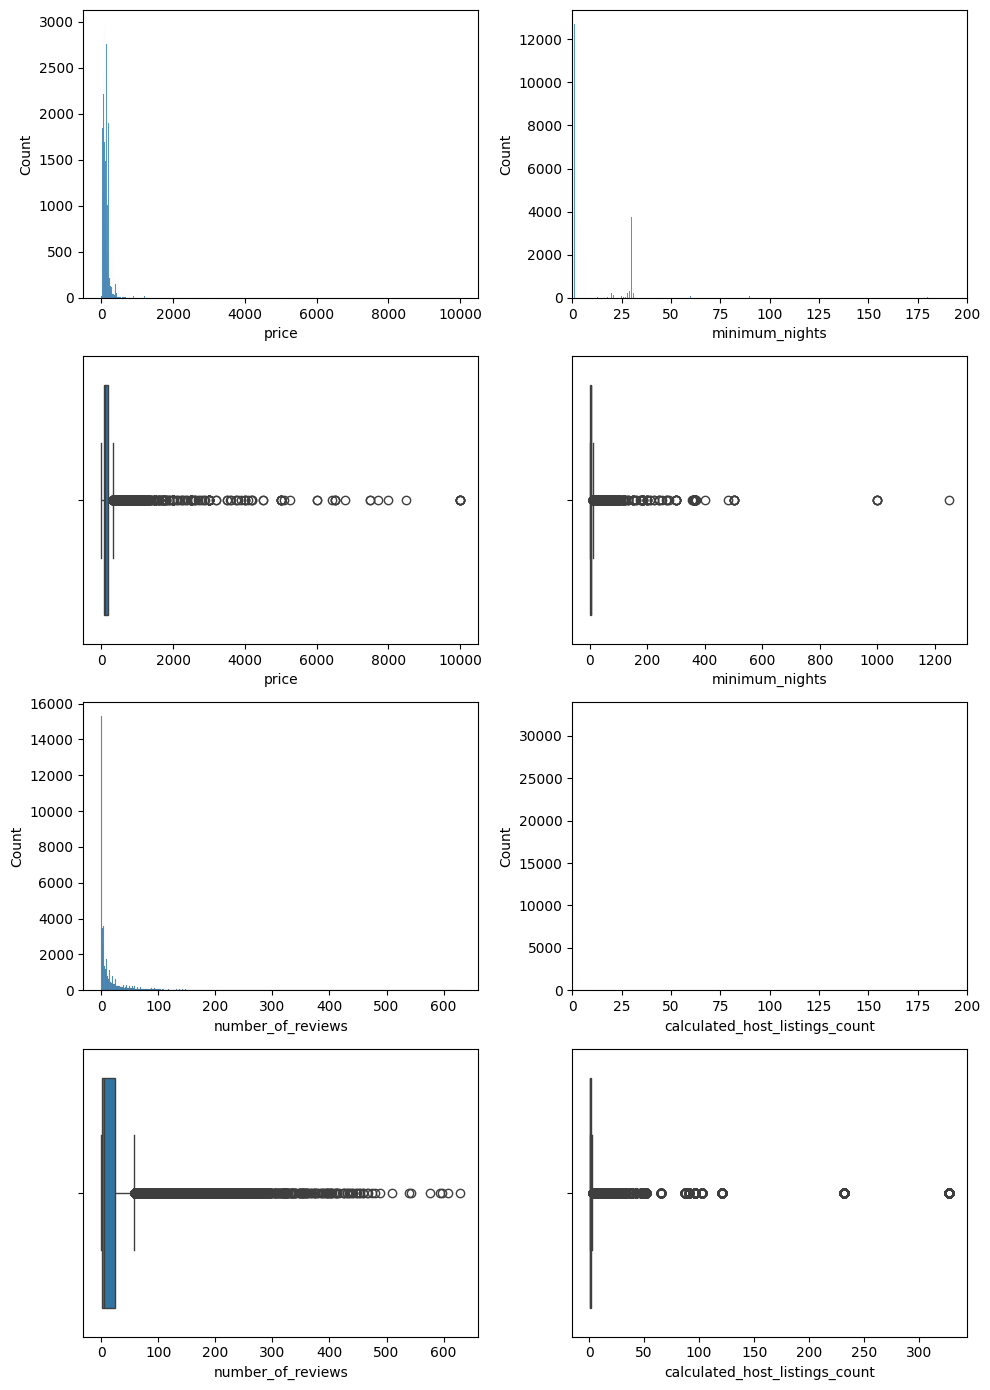

In [10]:
#Amalisis numericas

fig, axis = plt.subplots(4, 2, figsize = (10, 14))

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "price")
sns.boxplot(ax = axis[1, 0], data = df, x = "price")

sns.histplot(ax = axis[0, 1], data = df, x = "minimum_nights").set_xlim(0,200)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = df, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = df, x = "number_of_reviews")


sns.histplot(ax = axis[2,1], data = df, x = "calculated_host_listings_count").set_xlim(0,200)
sns.boxplot(ax = axis[3, 1], data = df, x = "calculated_host_listings_count")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()



De lo anterior podemos ver que en number_of_reviews y calculated_host_listing_counts tiene varios valores atipicos 

Analisis de varibales multicategoricas


Analisis númerico-númerico

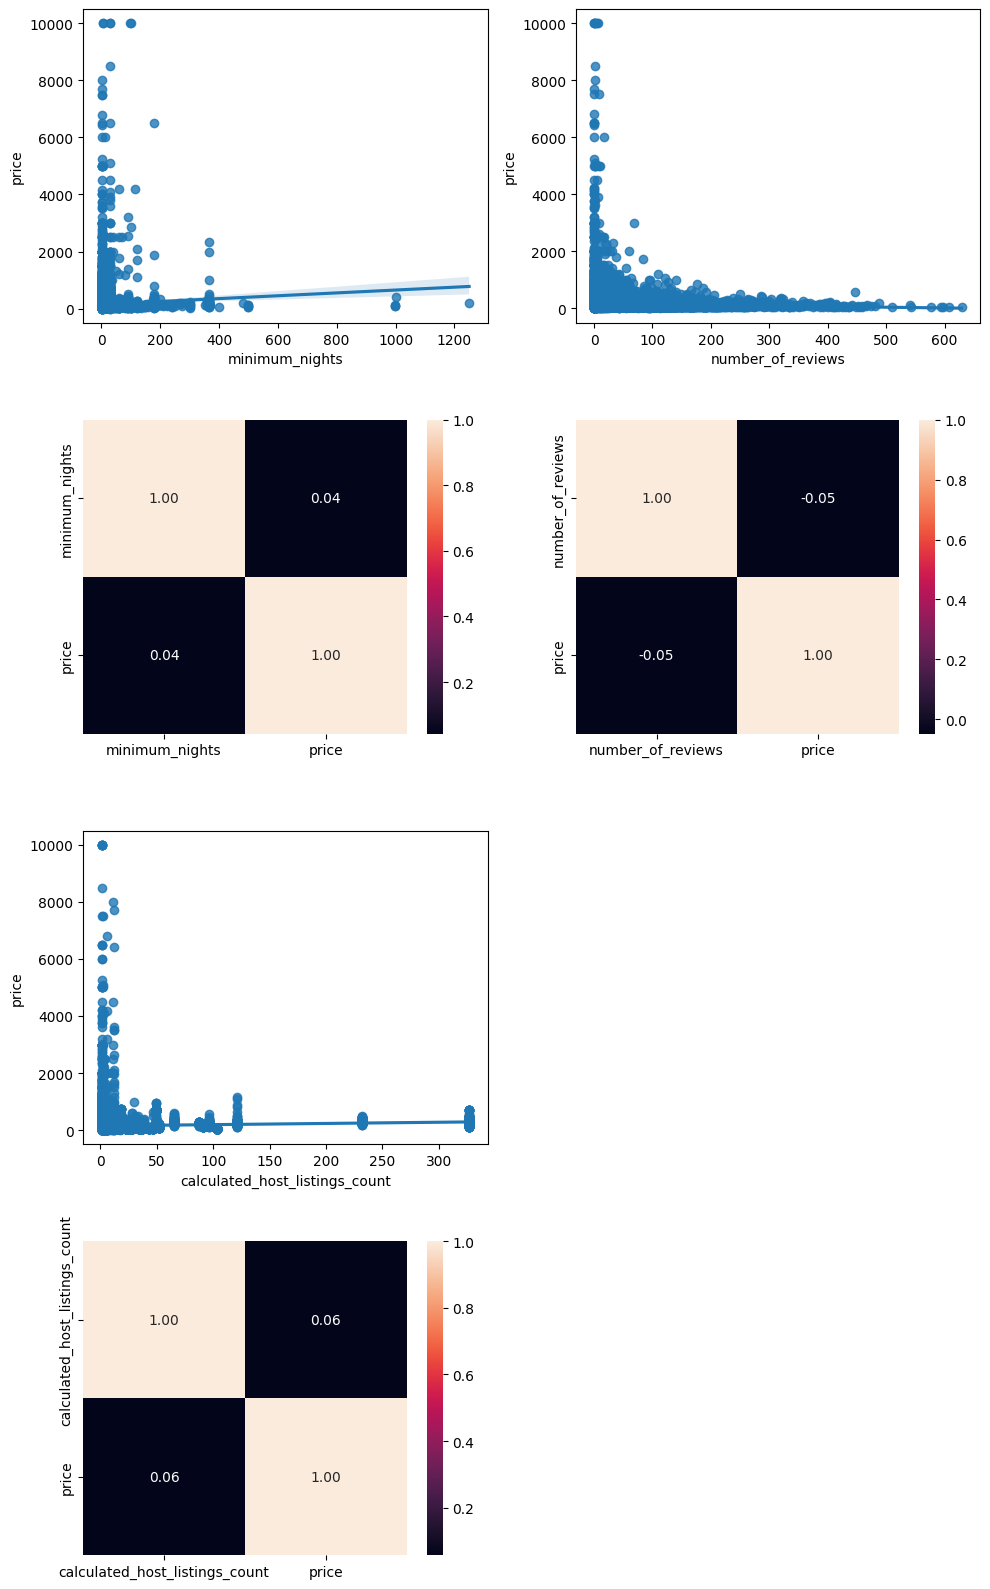

In [11]:
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax=axis[0,0],data=df,x="minimum_nights", y="price")
sns.heatmap(df[["minimum_nights","price"]].corr(), annot =True,fmt=".2f",ax=axis[1,0])

sns.regplot(ax=axis[0,1],data=df,x="number_of_reviews", y="price")
sns.heatmap(df[["number_of_reviews","price"]].corr(), annot =True,fmt=".2f",ax=axis[1,1])

sns.regplot(ax=axis[2,0],data=df,x="calculated_host_listings_count", y="price")
sns.heatmap(df[["calculated_host_listings_count","price"]].corr(), annot =True,fmt=".2f",ax=axis[3,0])

fig.delaxes(axis[2, 1]) #para eliminar axis del layout
fig.delaxes(axis[3, 1])

plt.tight_layout()

plt.show()



De lo anterior podemos concluir que no existe una fuerte relacion entre el precio y la cantidad de propiedades enlistadas por los propietarios ni entre el numero de reseñas y minimo de noches

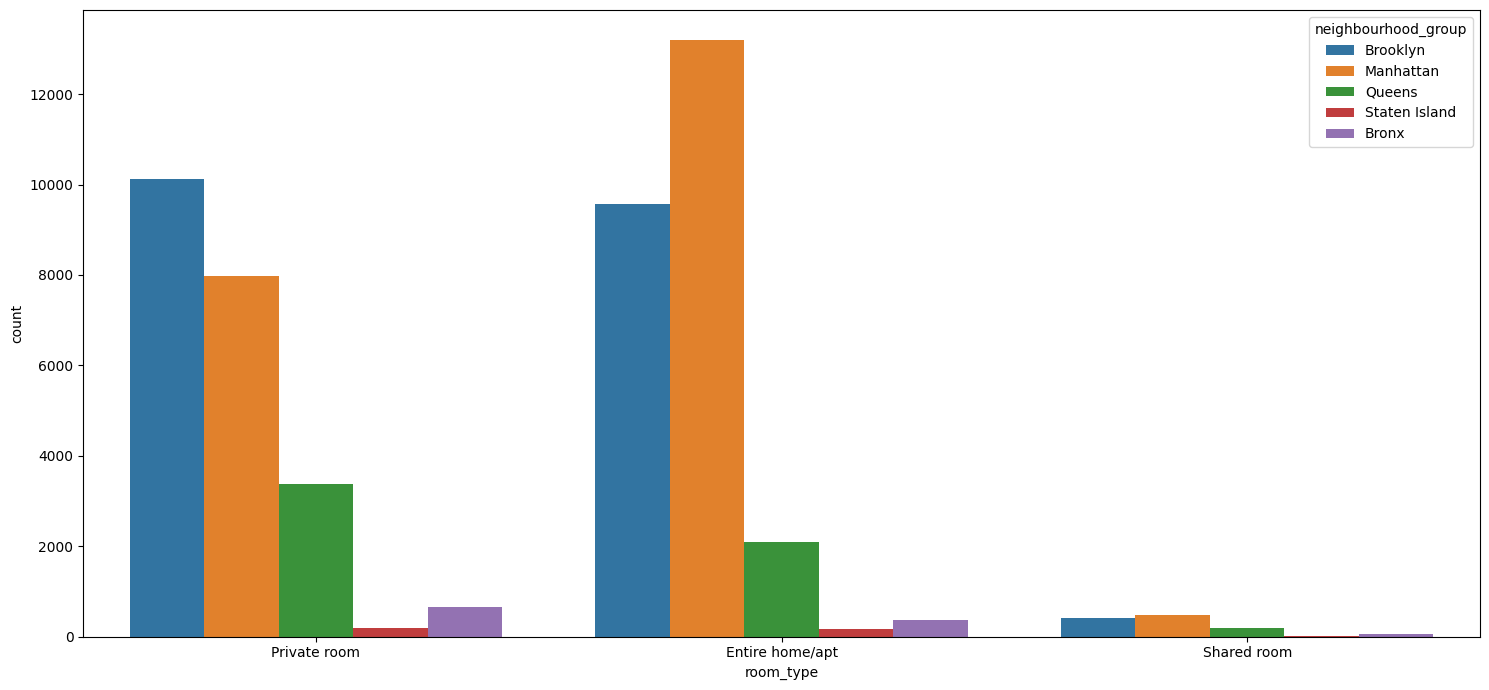

In [12]:
#Seguimos con variables Categoricas-Categoricas


fig, axis = plt.subplots(figsize = (15, 7))

sns.countplot(data = df, x = "room_type", hue = "neighbourhood_group")

plt.tight_layout()

plt.show()

Podemos observar que existe una ligera variación de cuartos privados entre el grupo de Brooklyn y Manhattan al igual en las propiedades completas hay mas en el grupo de Manhattan que en Brooklyn 

#Numerico - Categorico Analisis Completo

In [13]:
#Es momento de factorizar las variables categoricas para poder compararlas con las numericas

df["room_type"] = pd.factorize(df["room_type"])[0]
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood"] = pd.factorize(df["neighbourhood"])[0]


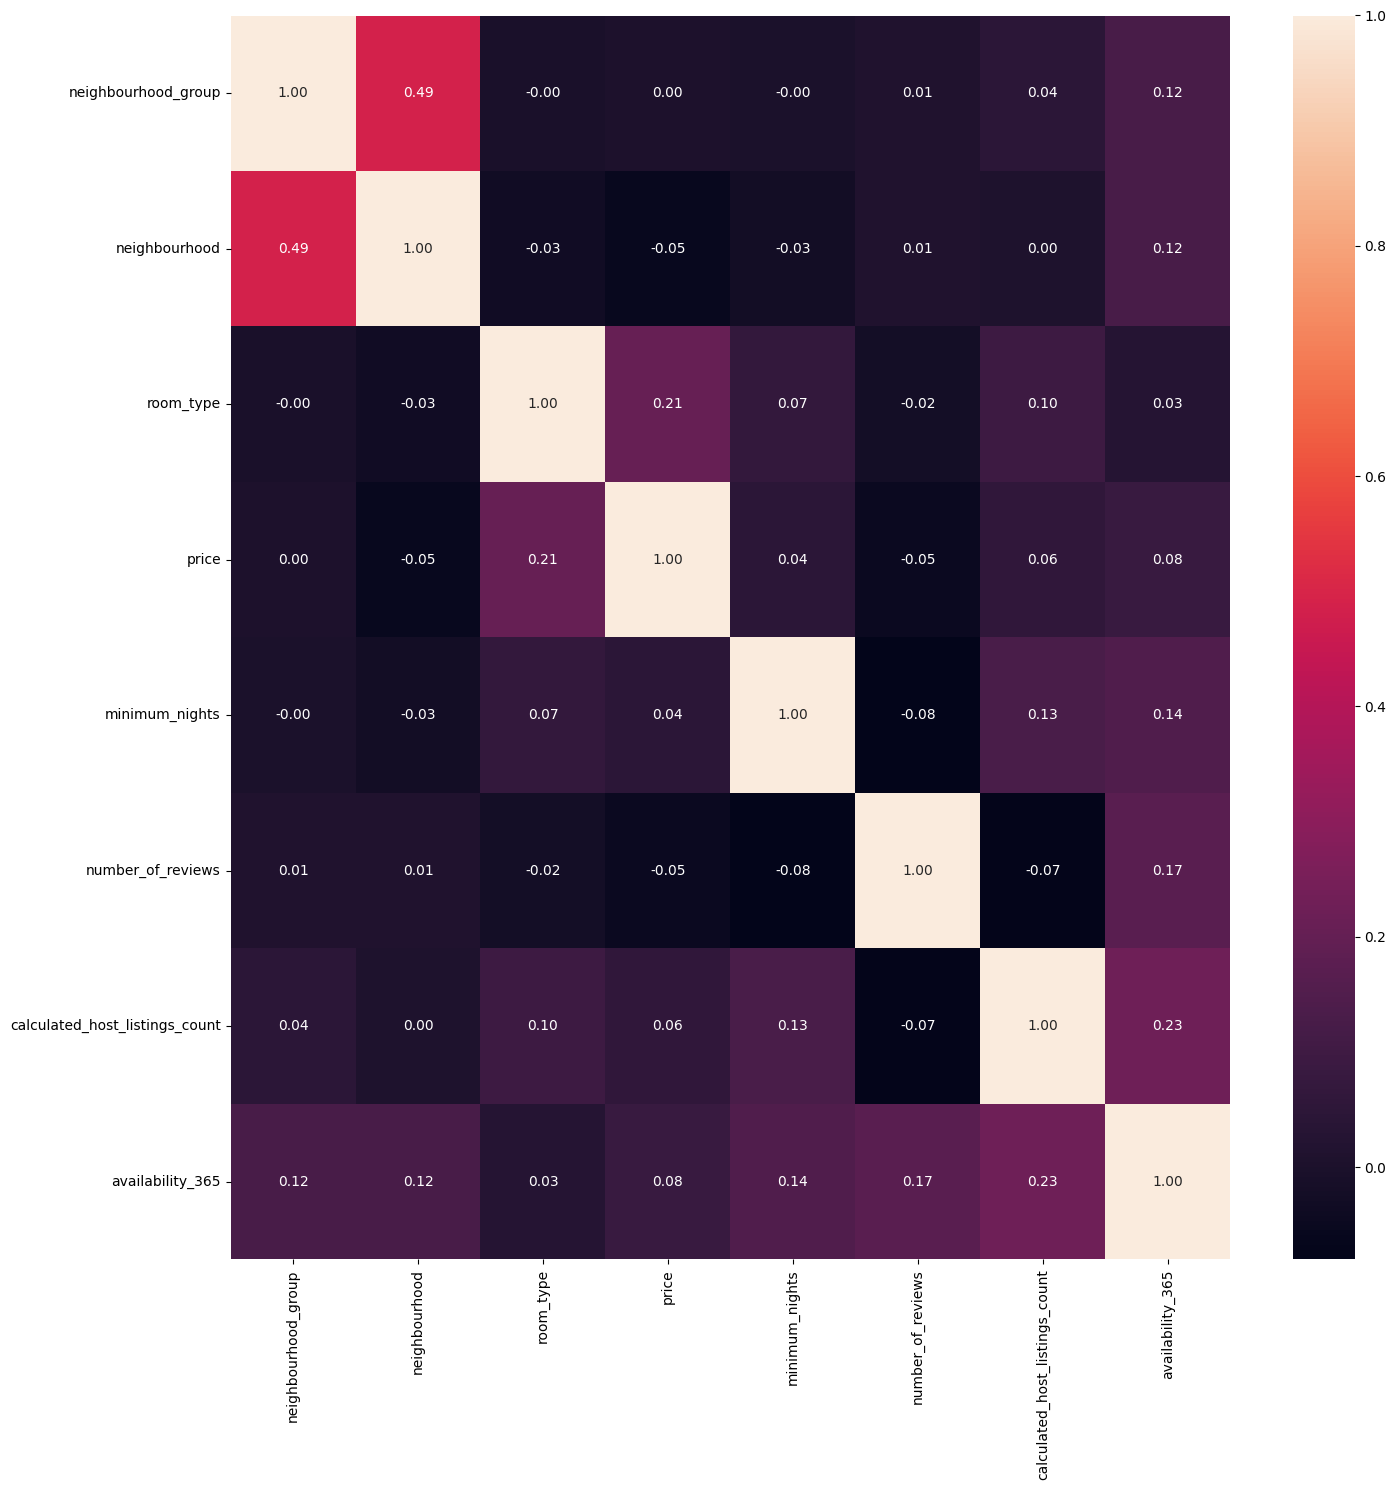

In [14]:
fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

Revisando el heatmap primero podemos apreciar que hay muy poca correlación entre los parametros si acaso se piede considerar una ligera relación entre la cantidad de propiedades listadas por anfitrion y la disponibilidad durante el año

Analizaremos todos los datos juntos

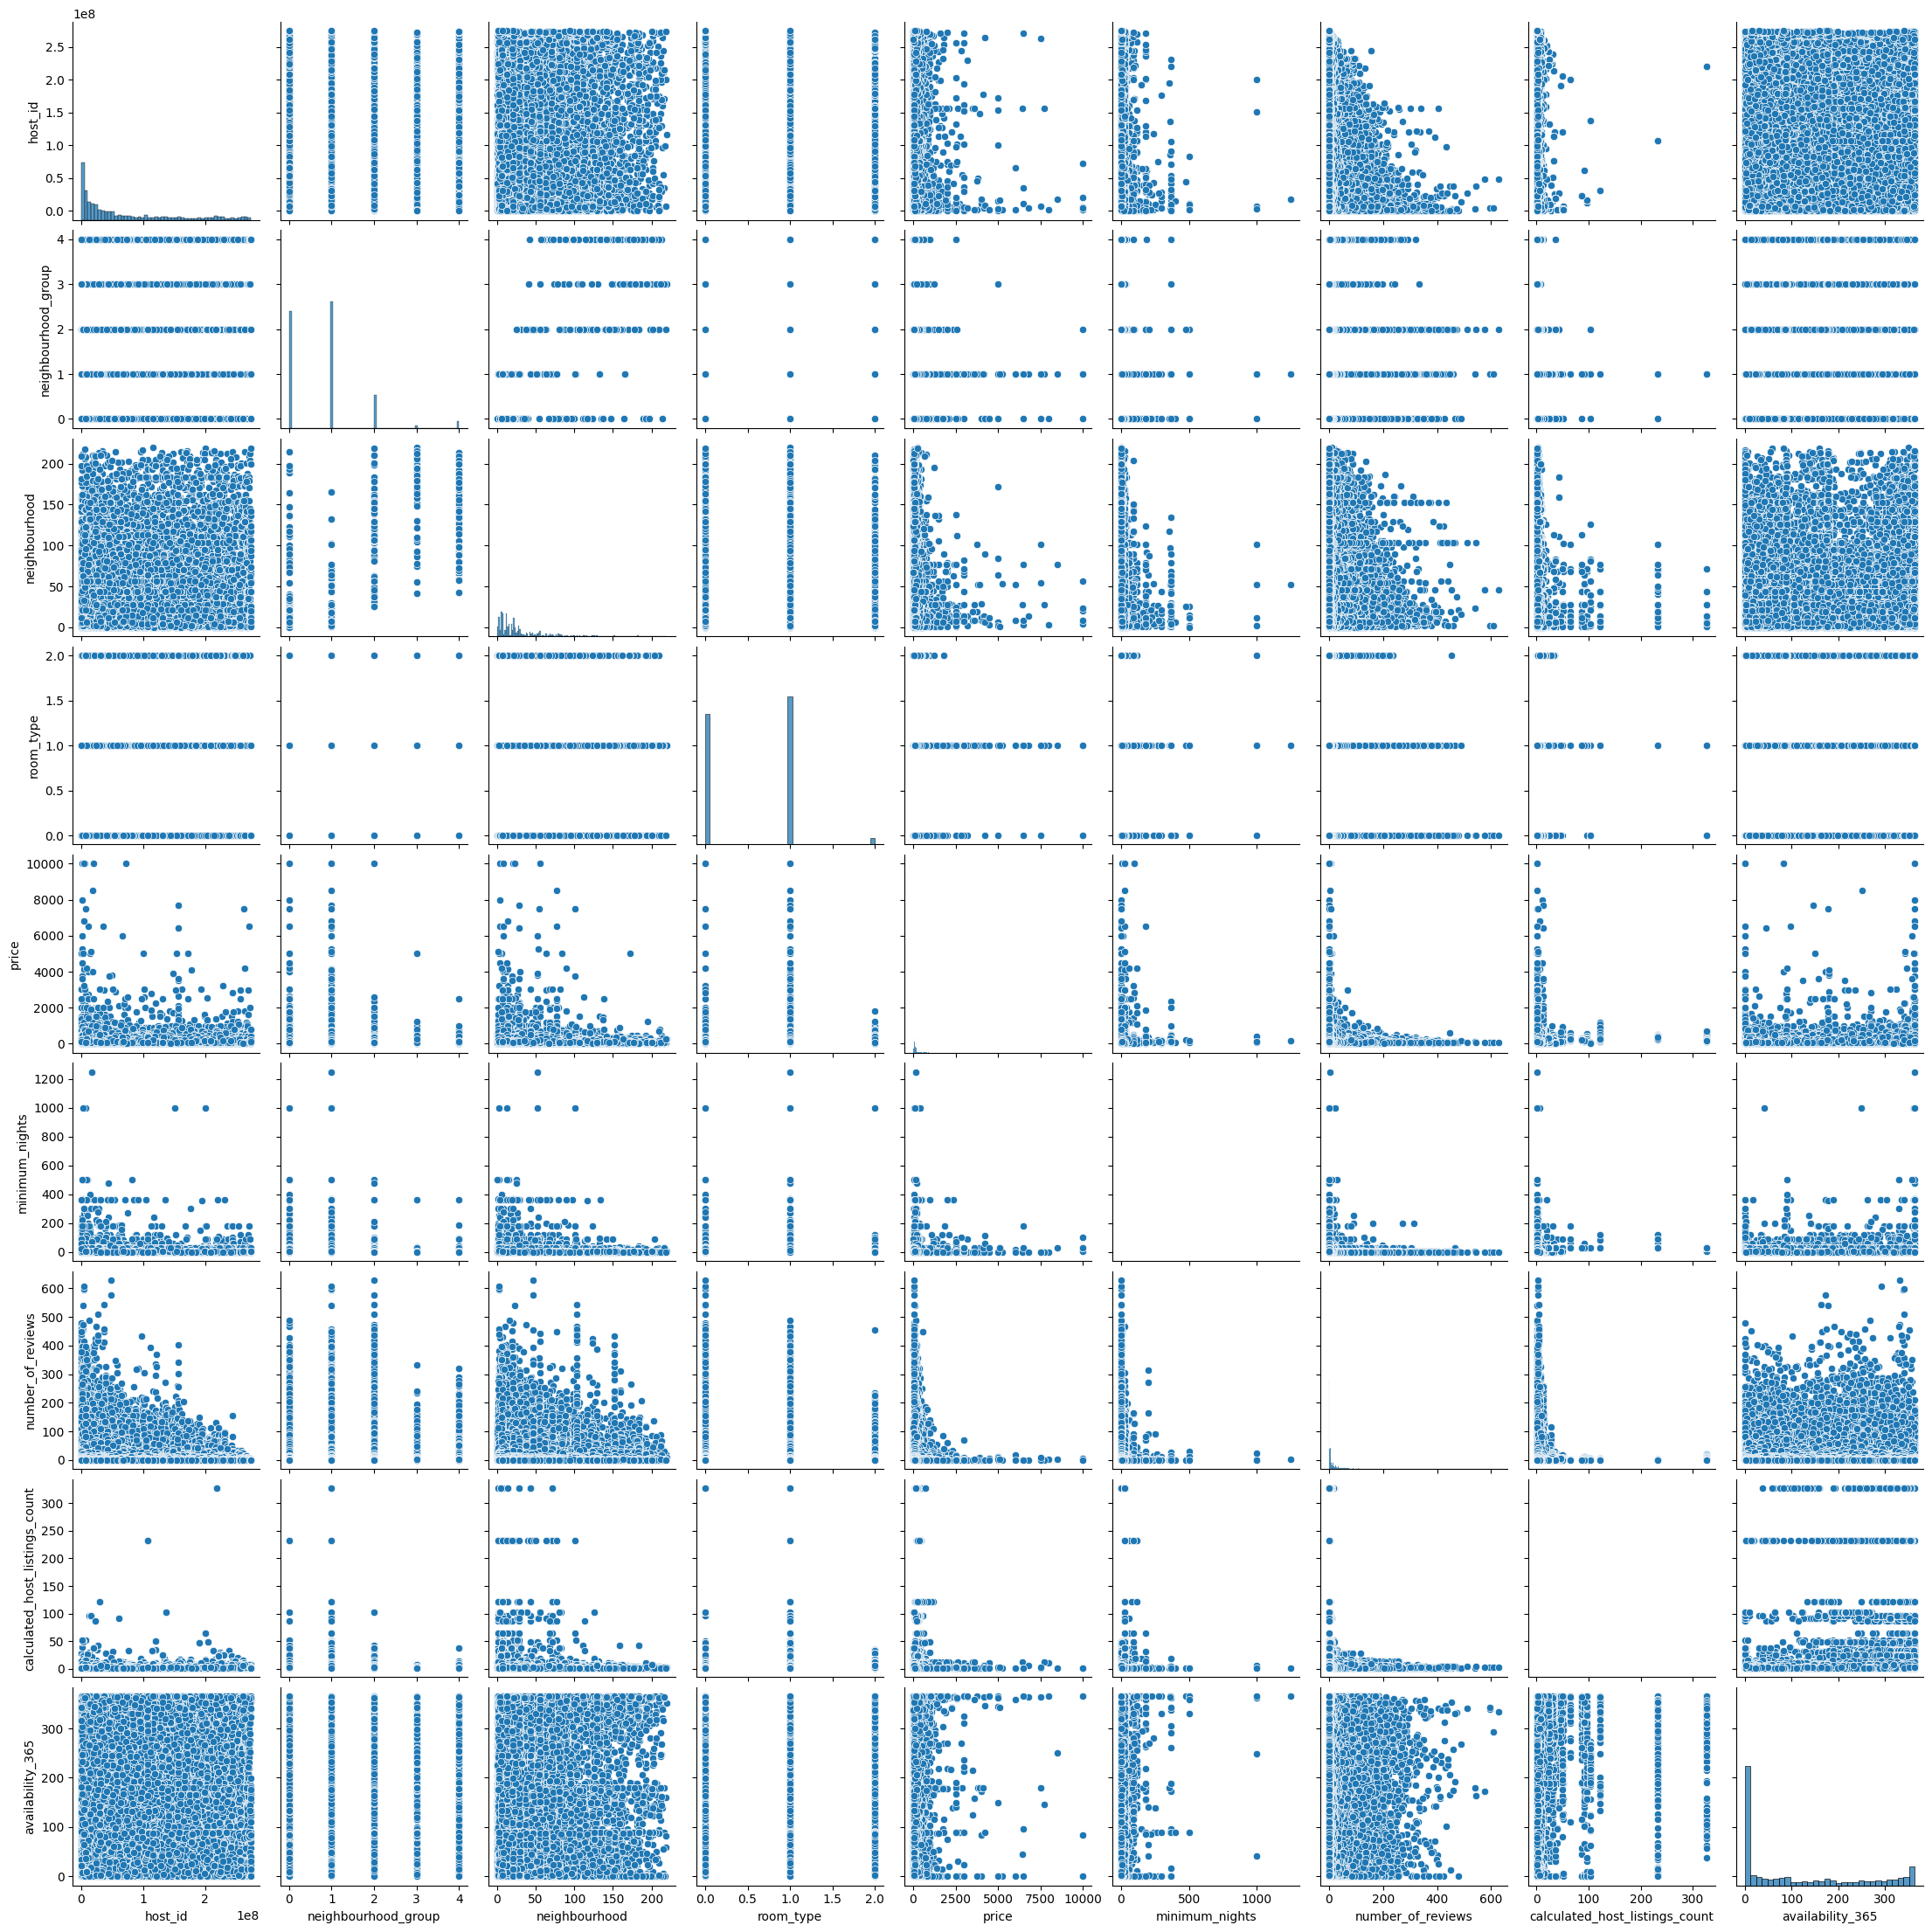

In [15]:
sns.pairplot(data = df)

Ingenieria de Características

In [16]:
df.describe()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,29.888782,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.844386,34.676634,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,7.500000,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,1.000000,19.000000,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,1.000000,37.000000,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,4.000000,220.000000,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


A simple vista se puede apreciar que price, minimum of nights, number of reviews y calculated host listing tienen tienen valores atipicos (outliners) que a continuación eliminaremos, rellenaremos o modificaremos segun sea el caso_

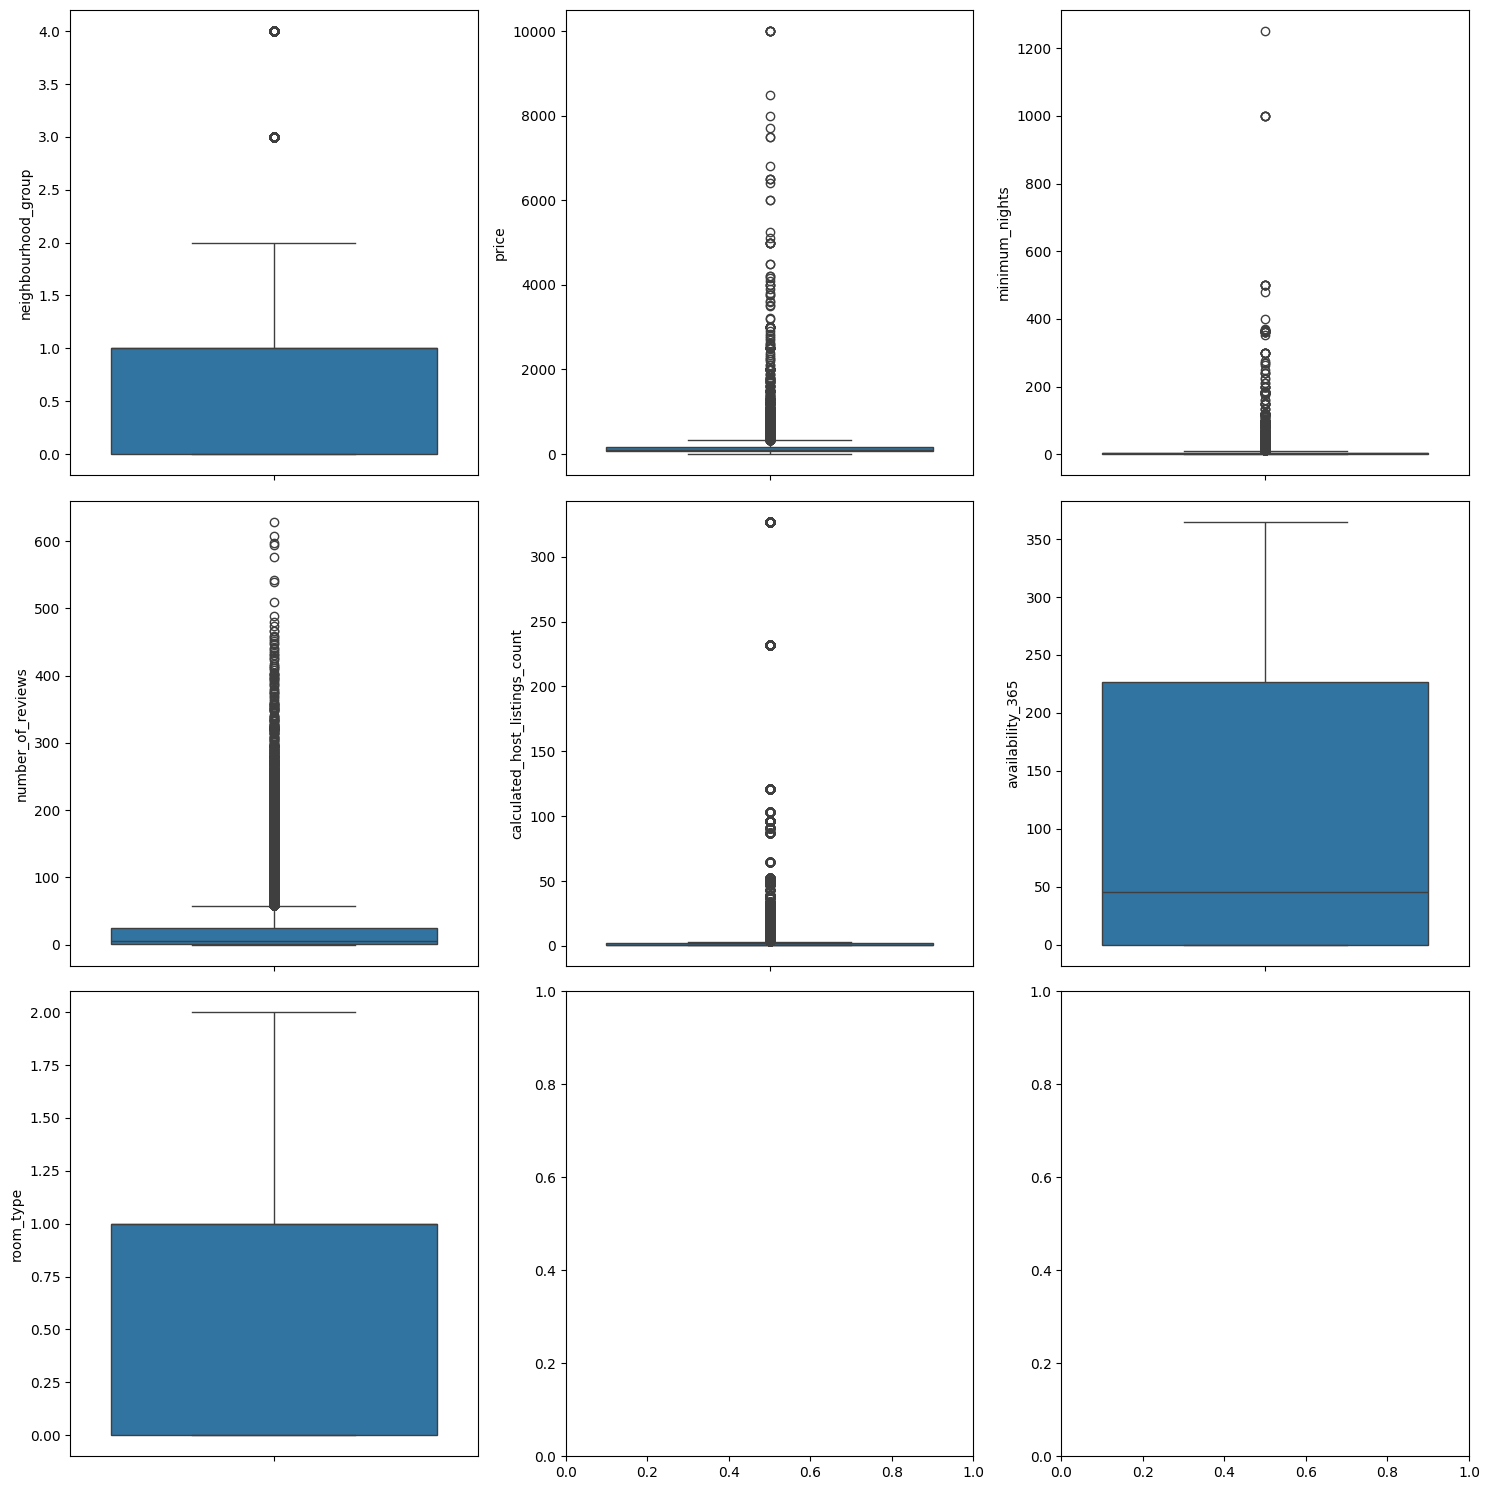

In [17]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = df, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = df, y = "price")
sns.boxplot(ax = axes[0, 2], data = df, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = df, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = df, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = df, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = df, y = "room_type")

plt.tight_layout()

plt.show()

Outliners

In [18]:
#Outliners para precio

estats_precio = df["price"].describe()
estats_precio

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [19]:
#IQR para precio

IQRPrecio=estats_precio["75%"]-estats_precio["25%"]
upperprecio=estats_precio["75%"]+(1.5*IQRPrecio)
lowerprecio=estats_precio["25%"]-(1.5*IQRPrecio)

print(f'los limites superiores e inferiores son {upperprecio} y {lowerprecio} mientras que su rango interquantil es {IQRPrecio}')

los limites superiores e inferiores son 334.0 y -90.0 mientras que su rango interquantil es 106.0


In [20]:
#vamos a quedarnos con todos los valores que sean superiores a 0
df = df[df["price"] > 0]


In [21]:
#Outlier para minimum_nights

estats_mn = df["minimum_nights"].describe()
estats_mn

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [22]:
IQRmn=estats_mn["75%"]-estats_mn["25%"]
uppermn=estats_mn["75%"]+(1.5*IQRmn)
lowermn=estats_mn["25%"]-(1.5*IQRmn)

print(f'los limites superiores e inferiores para el minimo de noches son {uppermn} y {lowermn} mientras que su rango interquantil es {IQRmn}')

los limites superiores e inferiores para el minimo de noches son 11.0 y -5.0 mientras que su rango interquantil es 4.0


In [23]:
df = df[df["minimum_nights"] <= 16]

In [24]:
#outliners para number of reviews

estats_reseñas = df["number_of_reviews"].describe()
estats_reseñas

count    43283.000000
mean        25.206039
std         46.284402
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [25]:
#No creo que sea necesario modificar estos ya que un numero de reseñas va ligado a cuantas veces se reserva una propiedad

IQRreseñas=estats_reseñas["75%"]-estats_reseñas["25%"]
upperreseñas=estats_reseñas["75%"]+(1.5*IQRPrecio)
lowerreseñas=estats_reseñas["25%"]-(1.5*IQRPrecio)

print(f'los limites superiores e inferiores para numero de reseñas son {upperreseñas} y {lowerreseñas} mientras que su rango interquantil es {IQRreseñas}')

los limites superiores e inferiores para numero de reseñas son 186.0 y -158.0 mientras que su rango interquantil es 26.0


In [26]:
#outliners para calculated_host_listings_count

estats_hostlist = df["calculated_host_listings_count"].describe()
estats_hostlist

count    43283.000000
mean         3.368528
std         21.717214
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [27]:
IQRhostlist=estats_hostlist["75%"]-estats_hostlist["25%"]
upperhostlist=estats_hostlist["75%"]+(1.5*IQRhostlist)
lowerhostlist=estats_hostlist["25%"]-(1.5*IQRhostlist)

print(f'los limites superiores e inferiores para numero propiedades listadas por host son {upperreseñas} y {lowerreseñas} mientras que su rango interquantil es {IQRreseñas}')

los limites superiores e inferiores para numero propiedades listadas por host son 186.0 y -158.0 mientras que su rango interquantil es 26.0


In [28]:
count0 = df[df["calculated_host_listings_count"] == 0].shape[0]
count1 = df[df["calculated_host_listings_count"] == 1].shape[0]
count2 = df[df["calculated_host_listings_count"] == 2].shape[0]
count3 = df[df["calculated_host_listings_count"] == 3].shape[0]
count4 = df[df["calculated_host_listings_count"] == 4].shape[0]
count5 = df[df["calculated_host_listings_count"] == 5].shape[0]
count6 = df[df["calculated_host_listings_count"] == 6].shape[0]
count7 = df[df["calculated_host_listings_count"] == 7].shape[0]
count8 = df[df["calculated_host_listings_count"] == 8].shape[0]

print(count0)
print(count1)
print(count2)
print(count3)
print(count4)
print(count5)
print(count6)
print(count7)
print(count8)

0
30266
6182
2621
1256
727
434
321
277


In [29]:
df = df[df["calculated_host_listings_count"] > 4]

In [30]:
df.isnull().sum().sort_values(ascending = False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"] #no incluimos price porque es el motivo del estudi
x=df.drop('price', axis=1)[num_variables]
y=df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

x_train.head()


,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type
48417,0,2,8,84,4,0
19841,64,1,6,0,0,2
36012,37,8,6,299,1,0
39803,18,1,5,48,1,2
48867,0,1,6,338,0,2


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train_norm = scaler.transform(x_train)
x_train_norm = pd.DataFrame(x_train_norm, index = x_train.index, columns = num_variables)

x_test_norm = scaler.transform(x_test)
x_test_norm = pd.DataFrame(x_test_norm, index = x_test.index, columns = num_variables)

x_train_norm.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type
48417,-0.559896,-0.128326,-0.292628,-1.127022,3.157586,-0.661550
19841,0.740178,-0.542542,-0.317929,-1.796014,-1.031283,2.291708
36012,0.191709,2.356968,-0.317929,0.585281,0.015934,-0.661550
39803,-0.194250,-0.542542,-0.330580,-1.413733,0.015934,2.291708
48867,-0.559896,-0.542542,-0.317929,0.895885,-1.031283,2.291708


In [34]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(x_train, y_train)

ix = selection_model.get_support()
x_train_sel = pd.DataFrame(selection_model.transform(x_train), columns = x_train.columns.values[ix])
x_test_sel = pd.DataFrame(selection_model.transform(x_test), columns = x_test.columns.values[ix])

x_train_sel.head()

,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type
0,2,8,84,4,0
1,1,6,0,0,2
2,8,6,299,1,0
3,1,5,48,1,2
4,1,6,338,0,2


In [36]:
x_train_sel["price"] = list(y_train)
x_test_sel["price"] = list(y_test)
x_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
x_test_sel.to_csv("../data/processed/clean_test.csv", index = False)